In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder,LabelBinarizer
from sklearn.metrics import accuracy_score,confusion_matrix,log_loss
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
import pickle
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [7]:
data=pd.read_csv(r'C:\Users\SPIRO\Downloads\data.csv')

In [8]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [9]:
data=data.drop('Unnamed: 0',axis=1)

In [10]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [11]:
data.isnull().sum()

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 179, dtype: int64

In [12]:
data.shape

(11500, 179)

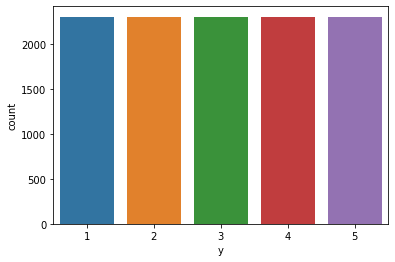

In [13]:
sns.countplot(data['y'])

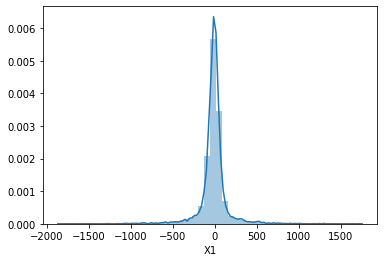

In [14]:
sns.distplot(data['X1'])

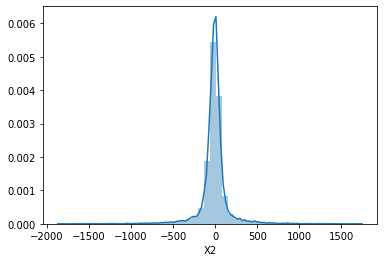

In [15]:
sns.distplot(data['X2'])

In [16]:
X=data.drop('y',axis=1)

In [17]:
pca=PCA(n_components=100)
X_pca=pca.fit_transform(X)
print(X_pca.shape)

(11500, 100)


In [24]:
y=data['y']

In [19]:
pca_vs_variance={}
for i in range(4,X.shape[1]):
    pca=PCA(n_components=i)
    principle_components=pca.fit_transform(X)
    pca_vs_variance[str(i)]=list()
    pca_vs_variance[str(i)]=pca.explained_variance_ratio_

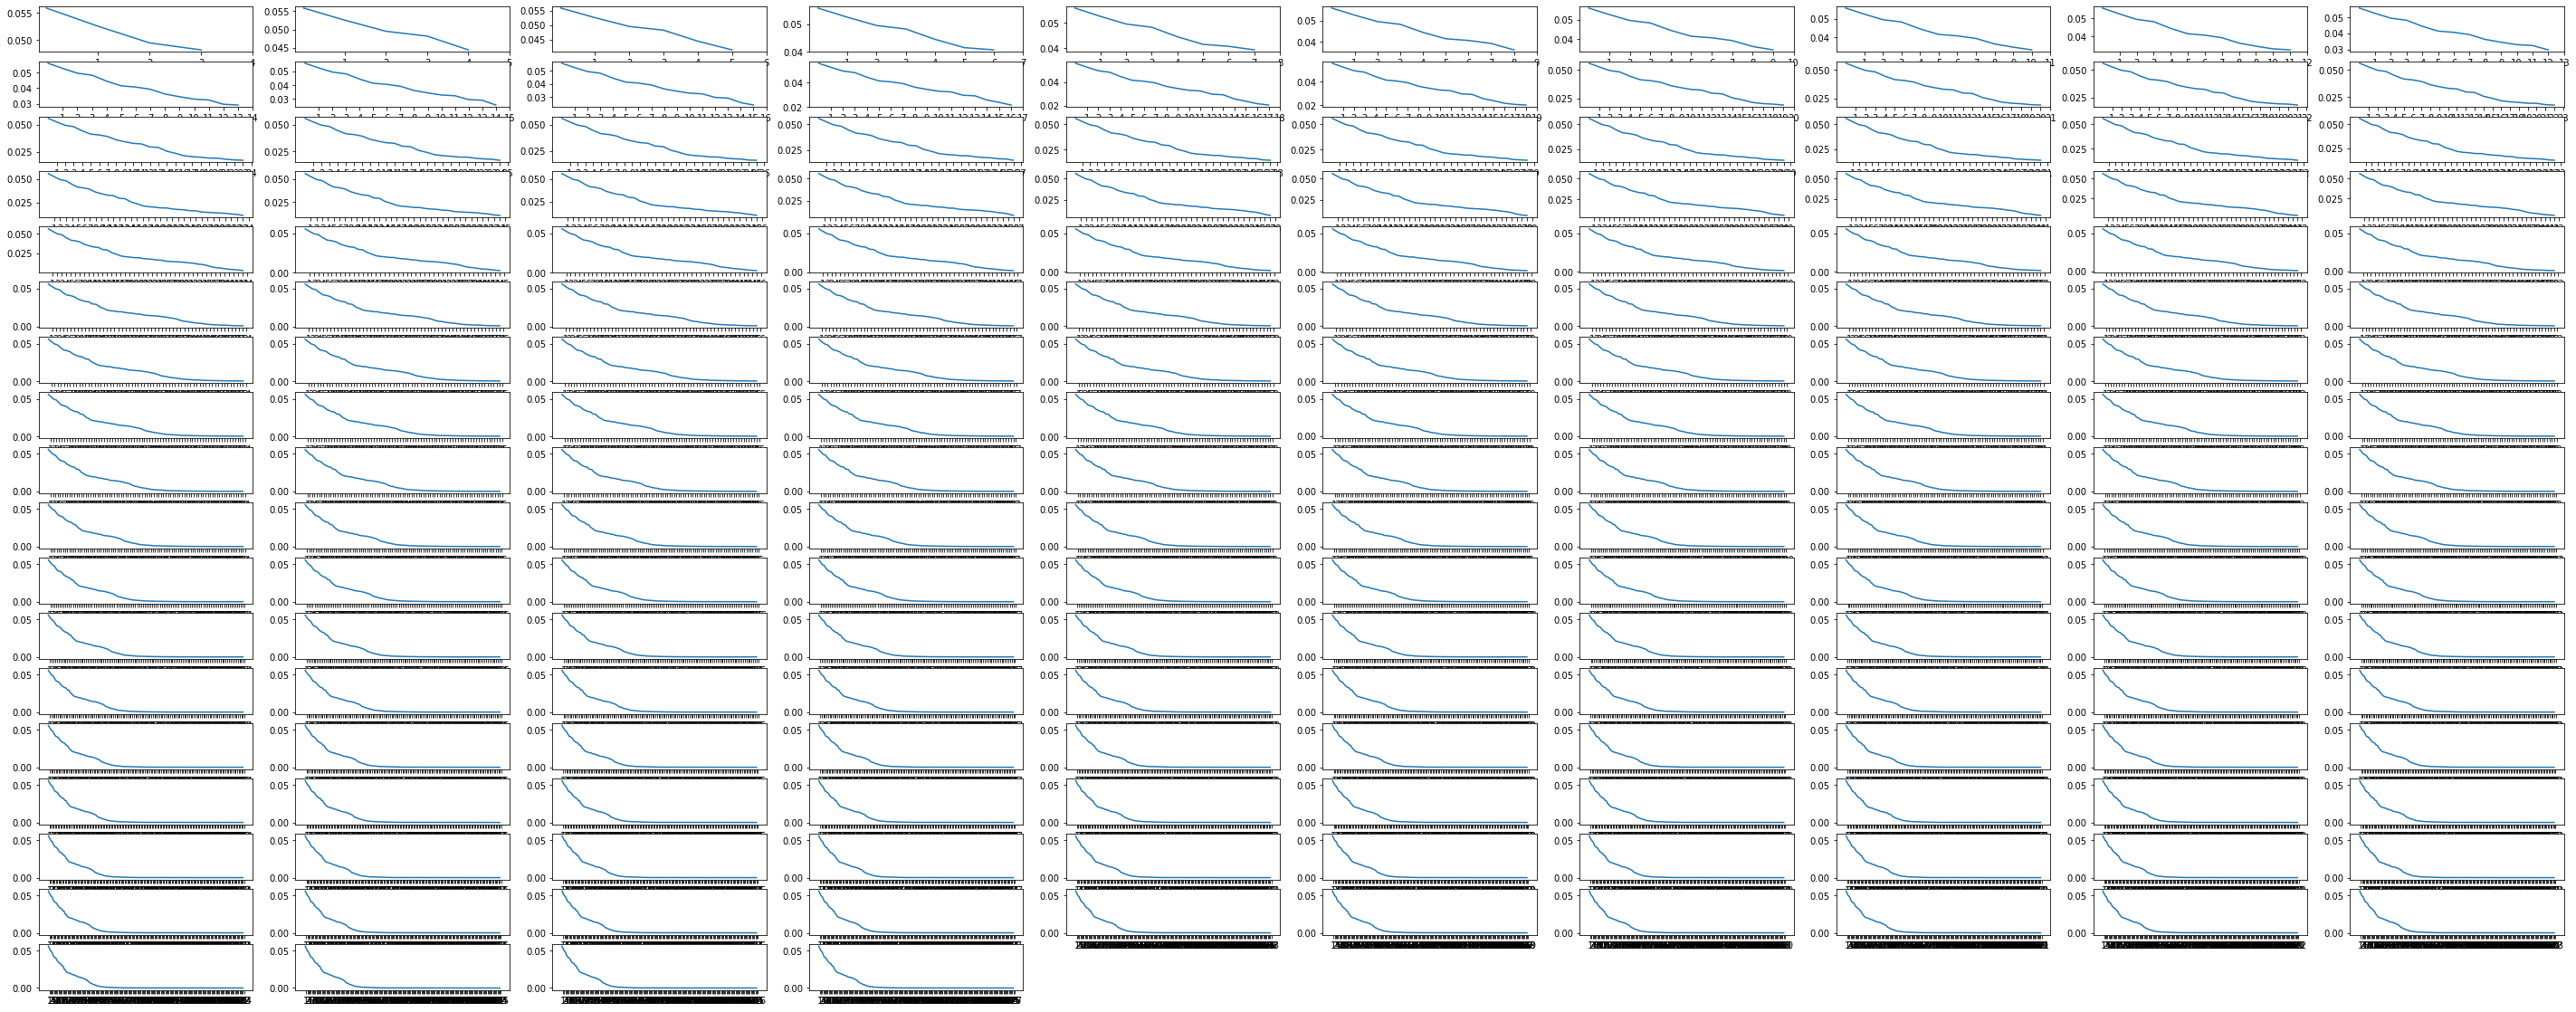

In [22]:
plt.figure(figsize=(50,20))
i=0
for p in pca_vs_variance:
    plt.subplot(18,10,i+1)
    plt.plot(pca_vs_variance[p])
    plt.xticks([j for j in range(1,int(p)+1)])
    i+=1
plt.show()

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X_pca,y,stratify=y,test_size=0.3,random_state=42)

In [31]:
error_rate=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))

Text(0, 0.5, 'Error Rate')

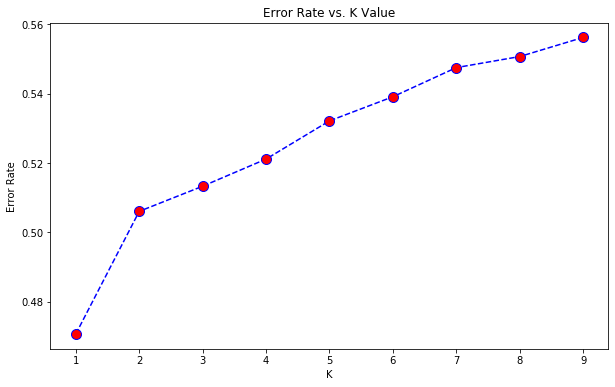

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color="blue", linestyle="dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")